In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("side_effect_data_1.xlsx")

In [3]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [4]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [5]:
df.dtypes

Kullanici_id                                 int64
Cinsiyet                                    object
Dogum_Tarihi                        datetime64[ns]
Uyruk                                       object
Il                                          object
Ilac_Adi                                    object
Ilac_Baslangic_Tarihi               datetime64[ns]
Ilac_Bitis_Tarihi                   datetime64[ns]
Yan_Etki                                    object
Yan_Etki_Bildirim_Tarihi            datetime64[ns]
Alerjilerim                                 object
Kronik Hastaliklarim                        object
Baba Kronik Hastaliklari                    object
Anne Kronik Hastaliklari                    object
Kiz Kardes Kronik Hastaliklari              object
Erkek Kardes Kronik Hastaliklari            object
Kan Grubu                                   object
Kilo                                       float64
Boy                                        float64
dtype: object

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
Boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


In [7]:
string_columns = list(df.dtypes[df.dtypes=="object"].index)
for col in string_columns:
    df[col]=df[col].str.lower()
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,male,1960-03-01,turkiye,canakkale,trifluoperazine,2022-01-09,2022-03-04,kabizlik,2022-02-19 18:28:43,ceviz,"hipertansiyon, kan hastaliklari","guatr, hipertansiyon",koah,"kemik erimesi, kalp hastaliklari","kemik erimesi, guatr",b rh-,103.0,191.0
1,140,male,1939-10-12,turkiye,trabzon,fluphenazine hcl,2022-01-09,2022-03-08,yorgunluk,2022-02-03 20:48:17,toz,NaN,"guatr, diger","hipertansiyon, kalp hastaliklari",,"koah, diyabet",NaN,81.0,181.0
2,2,female,1976-12-17,turkiye,canakkale,warfarin sodium,2022-01-11,2022-03-12,carpinti,2022-02-04 05:29:20,muz,"kalp hastaliklari, diyabet","diyabet, koah","kemik erimesi, diyabet","diyabet, kemik erimesi",diger,b rh-,93.0,158.0
3,83,male,1977-06-17,turkiye,adana,valproic acid,2022-01-04,2022-03-12,sinirlilik,2022-02-08 01:01:21,pancar,"diyabet, diger","kalp hastaliklari, diger",NaN,astim,"kalp hastaliklari, kanser",ab rh-,NaN,165.0
4,7,female,1976-09-03,turkiye,izmir,carbamazepine extended release,2022-01-13,2022-03-06,agizda farkli bir tat,2022-02-12 05:33:06,NaN,"diyabet, kalp hastaliklari","alzheimer, hipertansiyon","kan hastaliklari, kemik erimesi","diyabet, diger","alzheimer, hipertansiyon",ab rh-,99.0,172.0


In [8]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.head()

,kullanici_id,cinsiyet,dogum_tarihi,uyruk,il,ilac_adi,ilac_baslangic_tarihi,ilac_bitis_tarihi,yan_etki,yan_etki_bildirim_tarihi,alerjilerim,kronik_hastaliklarim,baba_kronik_hastaliklari,anne_kronik_hastaliklari,kiz_kardes_kronik_hastaliklari,erkek_kardes_kronik_hastaliklari,kan_grubu,kilo,boy
0,107,male,1960-03-01,turkiye,canakkale,trifluoperazine,2022-01-09,2022-03-04,kabizlik,2022-02-19 18:28:43,ceviz,"hipertansiyon, kan hastaliklari","guatr, hipertansiyon",koah,"kemik erimesi, kalp hastaliklari","kemik erimesi, guatr",b rh-,103.0,191.0
1,140,male,1939-10-12,turkiye,trabzon,fluphenazine hcl,2022-01-09,2022-03-08,yorgunluk,2022-02-03 20:48:17,toz,NaN,"guatr, diger","hipertansiyon, kalp hastaliklari",,"koah, diyabet",NaN,81.0,181.0
2,2,female,1976-12-17,turkiye,canakkale,warfarin sodium,2022-01-11,2022-03-12,carpinti,2022-02-04 05:29:20,muz,"kalp hastaliklari, diyabet","diyabet, koah","kemik erimesi, diyabet","diyabet, kemik erimesi",diger,b rh-,93.0,158.0
3,83,male,1977-06-17,turkiye,adana,valproic acid,2022-01-04,2022-03-12,sinirlilik,2022-02-08 01:01:21,pancar,"diyabet, diger","kalp hastaliklari, diger",NaN,astim,"kalp hastaliklari, kanser",ab rh-,NaN,165.0
4,7,female,1976-09-03,turkiye,izmir,carbamazepine extended release,2022-01-13,2022-03-06,agizda farkli bir tat,2022-02-12 05:33:06,NaN,"diyabet, kalp hastaliklari","alzheimer, hipertansiyon","kan hastaliklari, kemik erimesi","diyabet, diger","alzheimer, hipertansiyon",ab rh-,99.0,172.0


<Axes: >

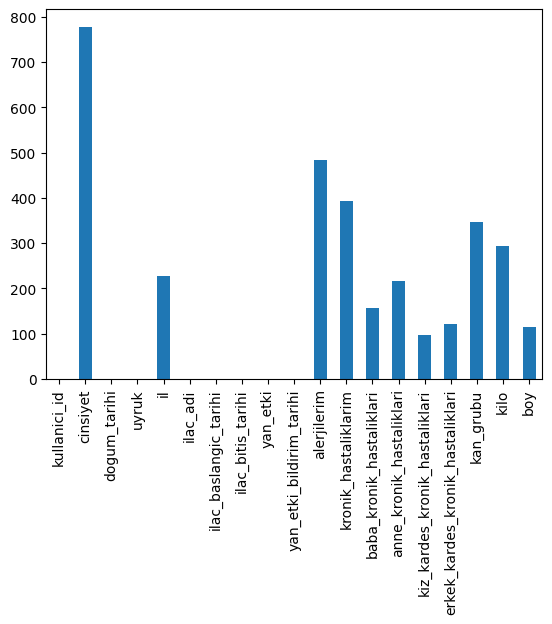

In [9]:
df.isna().sum().plot(kind='bar')

<Axes: xlabel='kan_grubu', ylabel='Count'>

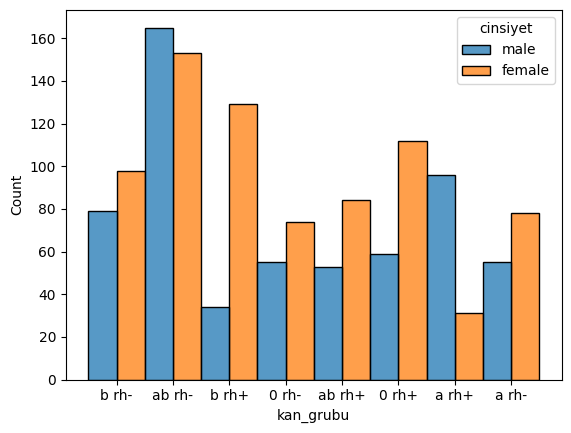

In [10]:
sns.histplot(data=df, x="kan_grubu", hue="cinsiyet", multiple="dodge", shrink=1)

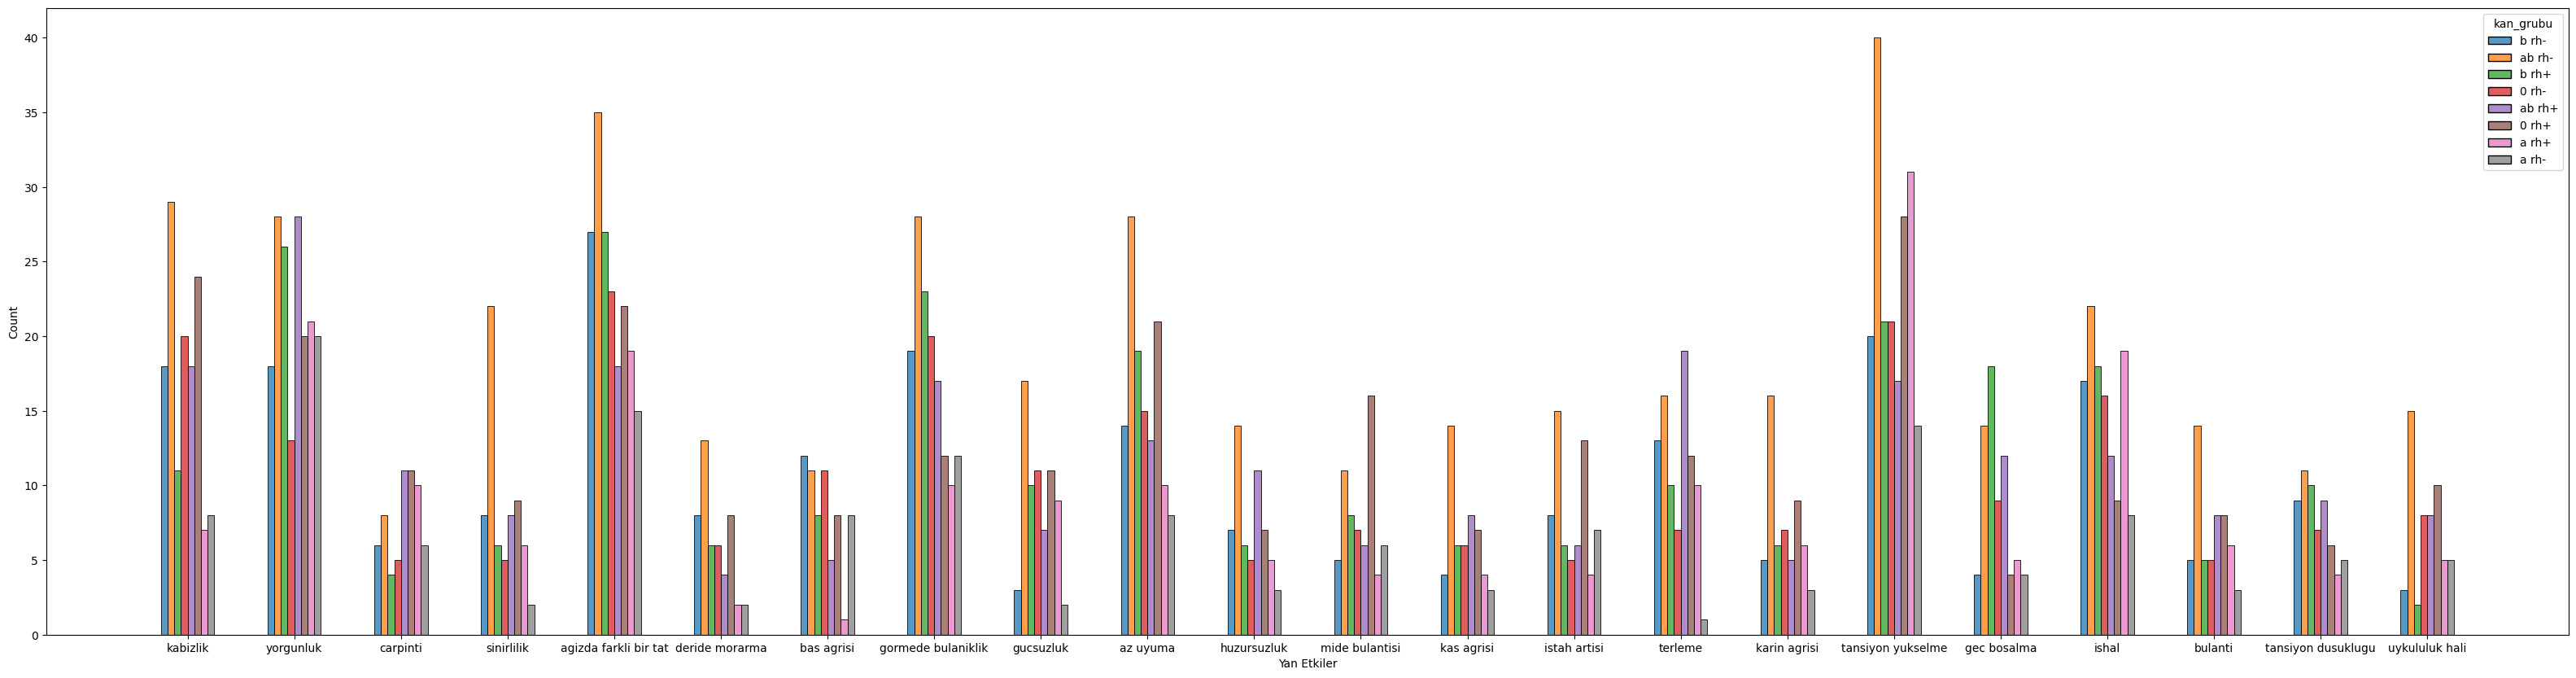

In [11]:
fig, ax = plt.subplots(figsize=(40, 10))  
sns.histplot(data=df, x="yan_etki", hue="kan_grubu", multiple="dodge", shrink=0.5, ax=ax)
plt.xlabel("Yan Etkiler")
plt.show()

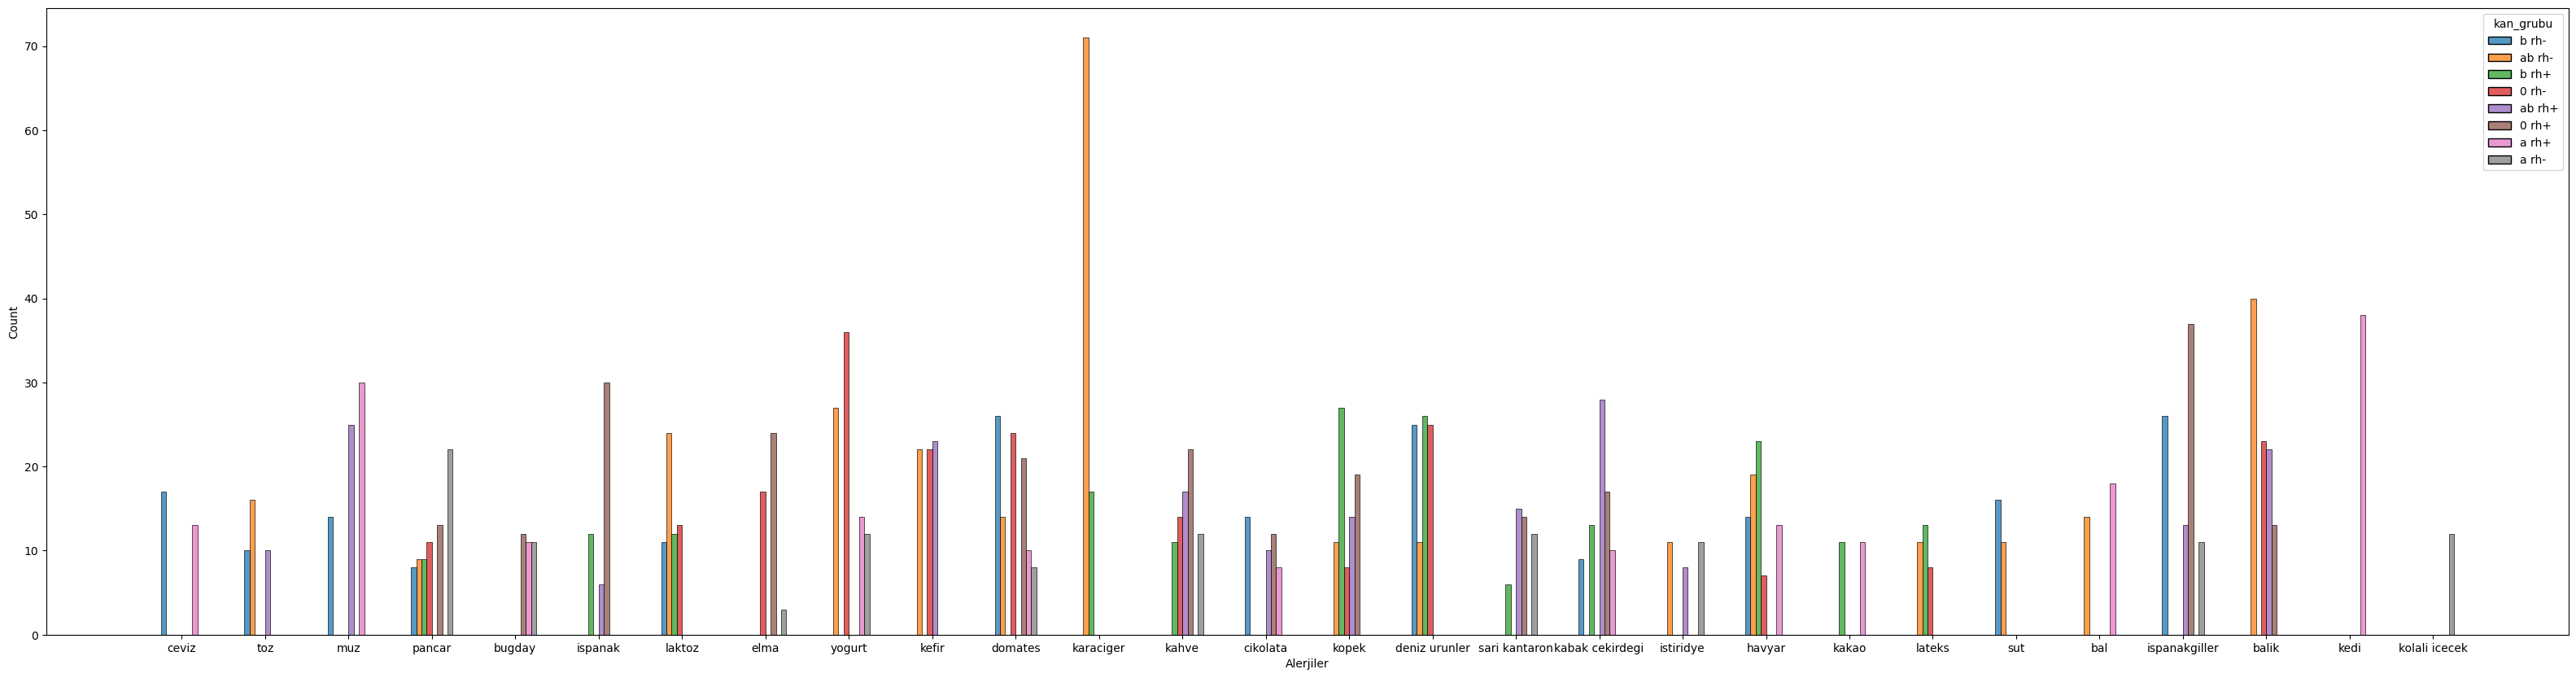

In [12]:
fig, ax = plt.subplots(figsize=(40, 10)) 
sns.histplot(data=df, x="alerjilerim", hue="kan_grubu", multiple="dodge", shrink=0.5, ax=ax)
plt.xlabel("Alerjiler")
plt.show()

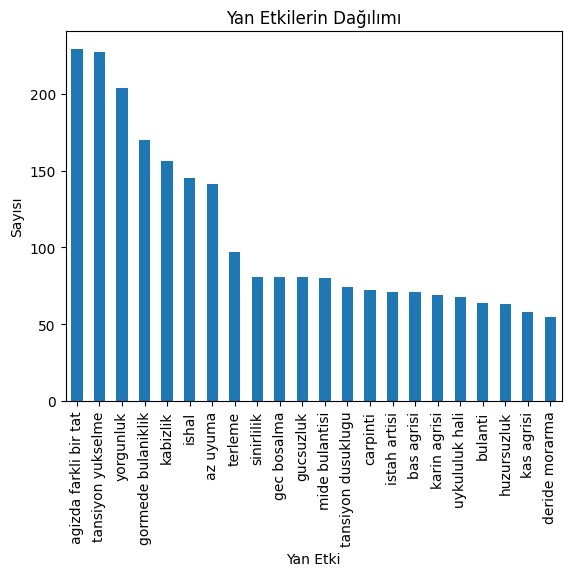

In [13]:
df['yan_etki'].value_counts().plot(kind='bar')
plt.title('Yan Etkilerin Dağılımı')
plt.xlabel('Yan Etki')
plt.ylabel('Sayısı')
plt.show()

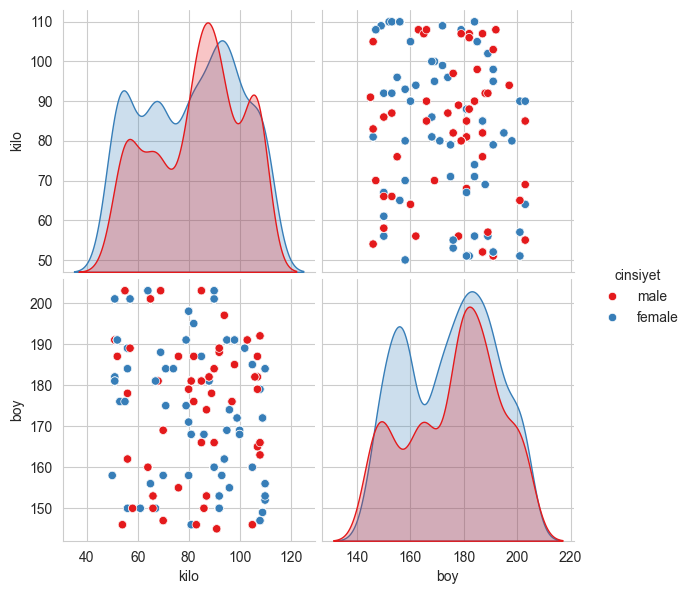

In [14]:
sns.set_style("whitegrid")
sns.pairplot(df[["kilo","boy","cinsiyet"]],
             hue="cinsiyet",
             height=3,
             palette="Set1")

In [15]:
missing_ratio = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"Verimizin % {missing_ratio} bir kaybı var" )

Verimizin % 7.2036263760802095 bir kaybı var


Eksik verilerin toplam veri sayısına oranını hesaplar. Bu değere göre veri setimizde işlem yapmak işimizi kolaylaştırır.

In [16]:
new_data = df.drop("kullanici_id", axis=1)
new_data.head(10)

,cinsiyet,dogum_tarihi,uyruk,il,ilac_adi,ilac_baslangic_tarihi,ilac_bitis_tarihi,yan_etki,yan_etki_bildirim_tarihi,alerjilerim,kronik_hastaliklarim,baba_kronik_hastaliklari,anne_kronik_hastaliklari,kiz_kardes_kronik_hastaliklari,erkek_kardes_kronik_hastaliklari,kan_grubu,kilo,boy
0,male,1960-03-01,turkiye,canakkale,trifluoperazine,2022-01-09,2022-03-04,kabizlik,2022-02-19 18:28:43,ceviz,"hipertansiyon, kan hastaliklari","guatr, hipertansiyon",koah,"kemik erimesi, kalp hastaliklari","kemik erimesi, guatr",b rh-,103.0,191.0
1,male,1939-10-12,turkiye,trabzon,fluphenazine hcl,2022-01-09,2022-03-08,yorgunluk,2022-02-03 20:48:17,toz,NaN,"guatr, diger","hipertansiyon, kalp hastaliklari",,"koah, diyabet",NaN,81.0,181.0
2,female,1976-12-17,turkiye,canakkale,warfarin sodium,2022-01-11,2022-03-12,carpinti,2022-02-04 05:29:20,muz,"kalp hastaliklari, diyabet","diyabet, koah","kemik erimesi, diyabet","diyabet, kemik erimesi",diger,b rh-,93.0,158.0
3,male,1977-06-17,turkiye,adana,valproic acid,2022-01-04,2022-03-12,sinirlilik,2022-02-08 01:01:21,pancar,"diyabet, diger","kalp hastaliklari, diger",NaN,astim,"kalp hastaliklari, kanser",ab rh-,NaN,165.0
4,female,1976-09-03,turkiye,izmir,carbamazepine extended release,2022-01-13,2022-03-06,agizda farkli bir tat,2022-02-12 05:33:06,NaN,"diyabet, kalp hastaliklari","alzheimer, hipertansiyon","kan hastaliklari, kemik erimesi","diyabet, diger","alzheimer, hipertansiyon",ab rh-,99.0,172.0
5,male,1982-01-05,turkiye,NaN,fluoxetine dr,2022-01-07,2022-03-19,agizda farkli bir tat,2022-02-04 08:08:31,NaN,"diyabet, hipertansiyon",NaN,"alzheimer, kalp hastaliklari",kanser,"diyabet, kemik erimesi",ab rh-,66.0,150.0
6,NaN,1997-01-10,turkiye,mersin,carbamazepine extended release,2022-01-05,2022-03-07,agizda farkli bir tat,2022-02-19 17:39:48,bugday,"koah, diyabet","kalp hastaliklari, kan hastaliklari",NaN,"kan hastaliklari, hipertansiyon","koah, kalp hastaliklari",NaN,NaN,147.0
7,NaN,1997-01-15,turkiye,antalya,thiothixene,2022-01-10,2022-03-07,deride morarma,2022-02-09 20:53:54,ispanak,"astim, diyabet","alzheimer, diyabet",koah,"guatr, kan hastaliklari","guatr, kan hastaliklari",b rh+,96.0,162.0
8,female,1973-08-05,turkiye,NaN,"asenapine tablet, sublingual",2022-01-08,2022-03-17,bas agrisi,2022-02-19 04:14:26,laktoz,NaN,"kan hastaliklari, diger","kanser, guatr","alzheimer, hipertansiyon","kanser, kalp hastaliklari",0 rh-,91.0,NaN
9,NaN,1941-10-16,turkiye,adana,fluphenazine hcl elixir,2022-01-10,2022-03-13,gormede bulaniklik,2022-02-09 01:16:50,elma,"kemik erimesi, koah",hipertansiyon,"koah, alzheimer","koah, alzheimer","astim, kan hastaliklari",0 rh-,107.0,156.0


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

new_data[["cinsiyet","il","alerjilerim","kronik_hastaliklarim","kan_grubu"]] = imputer.fit_transform(new_data[["cinsiyet","il","alerjilerim","kronik_hastaliklarim","kan_grubu"]])

In [18]:
new_data.isnull().sum()

cinsiyet                              0
dogum_tarihi                          0
uyruk                                 0
il                                    0
ilac_adi                              0
ilac_baslangic_tarihi                 0
ilac_bitis_tarihi                     0
yan_etki                              0
yan_etki_bildirim_tarihi              0
alerjilerim                           0
kronik_hastaliklarim                  0
baba_kronik_hastaliklari            156
anne_kronik_hastaliklari            217
kiz_kardes_kronik_hastaliklari       97
erkek_kardes_kronik_hastaliklari    121
kan_grubu                             0
kilo                                293
boy                                 114
dtype: int64

In [25]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
new_data[["kilo","boy"]] = knn_imputer.fit_transform(new_data[["kilo","boy"]])

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

new_data["cinsiyet"] = le.fit_transform(new_data["cinsiyet"])

new_data.head()


,cinsiyet,dogum_tarihi,uyruk,il,ilac_adi,ilac_baslangic_tarihi,ilac_bitis_tarihi,yan_etki,yan_etki_bildirim_tarihi,alerjilerim,kronik_hastaliklarim,baba_kronik_hastaliklari,anne_kronik_hastaliklari,kiz_kardes_kronik_hastaliklari,erkek_kardes_kronik_hastaliklari,kan_grubu,kilo,boy
0,1,1960-03-01,turkiye,canakkale,trifluoperazine,2022-01-09,2022-03-04,kabizlik,2022-02-19 18:28:43,ceviz,"hipertansiyon, kan hastaliklari","guatr, hipertansiyon",koah,"kemik erimesi, kalp hastaliklari","kemik erimesi, guatr",b rh-,103.0,191.0
1,1,1939-10-12,turkiye,trabzon,fluphenazine hcl,2022-01-09,2022-03-08,yorgunluk,2022-02-03 20:48:17,toz,"alzheimer, diger","guatr, diger","hipertansiyon, kalp hastaliklari","kemik erimesi, kalp hastaliklari","koah, diyabet",ab rh-,81.0,181.0
2,0,1976-12-17,turkiye,canakkale,warfarin sodium,2022-01-11,2022-03-12,carpinti,2022-02-04 05:29:20,muz,"kalp hastaliklari, diyabet","diyabet, koah","kemik erimesi, diyabet","diyabet, kemik erimesi",diger,b rh-,93.0,158.0
3,1,1977-06-17,turkiye,adana,valproic acid,2022-01-04,2022-03-12,sinirlilik,2022-02-08 01:01:21,pancar,"diyabet, diger","kalp hastaliklari, diger","kemik erimesi, diyabet",astim,"kalp hastaliklari, kanser",ab rh-,96.2,165.0
4,0,1976-09-03,turkiye,izmir,carbamazepine extended release,2022-01-13,2022-03-06,agizda farkli bir tat,2022-02-12 05:33:06,domates,"diyabet, kalp hastaliklari","alzheimer, hipertansiyon","kan hastaliklari, kemik erimesi","diyabet, diger","alzheimer, hipertansiyon",ab rh-,99.0,172.0


In [21]:
new_data.isnull().sum()

cinsiyet                              0
dogum_tarihi                          0
uyruk                                 0
il                                    0
ilac_adi                              0
ilac_baslangic_tarihi                 0
ilac_bitis_tarihi                     0
yan_etki                              0
yan_etki_bildirim_tarihi              0
alerjilerim                           0
kronik_hastaliklarim                  0
baba_kronik_hastaliklari            156
anne_kronik_hastaliklari            217
kiz_kardes_kronik_hastaliklari       97
erkek_kardes_kronik_hastaliklari    121
kan_grubu                             0
kilo                                  0
boy                                   0
dtype: int64

In [24]:
new_data.replace(['', ' ', '   '], np.nan, inplace=True)
new_data.fillna(method='ffill', inplace=True)
new_data.isnull().sum()

cinsiyet                            0
dogum_tarihi                        0
uyruk                               0
il                                  0
ilac_adi                            0
ilac_baslangic_tarihi               0
ilac_bitis_tarihi                   0
yan_etki                            0
yan_etki_bildirim_tarihi            0
alerjilerim                         0
kronik_hastaliklarim                0
baba_kronik_hastaliklari            0
anne_kronik_hastaliklari            0
kiz_kardes_kronik_hastaliklari      0
erkek_kardes_kronik_hastaliklari    0
kan_grubu                           0
kilo                                0
boy                                 0
dtype: int64

In [23]:
new_data

,cinsiyet,dogum_tarihi,uyruk,il,ilac_adi,ilac_baslangic_tarihi,ilac_bitis_tarihi,yan_etki,yan_etki_bildirim_tarihi,alerjilerim,kronik_hastaliklarim,baba_kronik_hastaliklari,anne_kronik_hastaliklari,kiz_kardes_kronik_hastaliklari,erkek_kardes_kronik_hastaliklari,kan_grubu,kilo,boy
0,1,1960-03-01,turkiye,canakkale,trifluoperazine,2022-01-09,2022-03-04,kabizlik,2022-02-19 18:28:43,ceviz,"hipertansiyon, kan hastaliklari","guatr, hipertansiyon",koah,"kemik erimesi, kalp hastaliklari","kemik erimesi, guatr",b rh-,103.0,191.0
1,1,1939-10-12,turkiye,trabzon,fluphenazine hcl,2022-01-09,2022-03-08,yorgunluk,2022-02-03 20:48:17,toz,"alzheimer, diger","guatr, diger","hipertansiyon, kalp hastaliklari","kemik erimesi, kalp hastaliklari","koah, diyabet",ab rh-,81.0,181.0
2,0,1976-12-17,turkiye,canakkale,warfarin sodium,2022-01-11,2022-03-12,carpinti,2022-02-04 05:29:20,muz,"kalp hastaliklari, diyabet","diyabet, koah","kemik erimesi, diyabet","diyabet, kemik erimesi",diger,b rh-,93.0,158.0
3,1,1977-06-17,turkiye,adana,valproic acid,2022-01-04,2022-03-12,sinirlilik,2022-02-08 01:01:21,pancar,"diyabet, diger","kalp hastaliklari, diger","kemik erimesi, diyabet",astim,"kalp hastaliklari, kanser",ab rh-,96.2,165.0
4,0,1976-09-03,turkiye,izmir,carbamazepine extended release,2022-01-13,2022-03-06,agizda farkli bir tat,2022-02-12 05:33:06,domates,"diyabet, kalp hastaliklari","alzheimer, hipertansiyon","kan hastaliklari, kemik erimesi","diyabet, diger","alzheimer, hipertansiyon",ab rh-,99.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,0,1957-01-04,turkiye,adana,"desoximetasone spray, non-aerosol",2022-01-13,2022-03-04,ishal,2022-02-12 19:13:43,ispanakgiller,"alzheimer, diger","kalp hastaliklari, kanser","astim, guatr","kalp hastaliklari, astim","koah, kan hastaliklari",ab rh-,50.0,152.0
2353,0,2004-11-09,turkiye,mersin,olanzapine-fluoxetine,2022-01-02,2022-03-05,agizda farkli bir tat,2022-02-19 17:39:48,istiridye,"alzheimer, diger","hipertansiyon, astim","astim, kemik erimesi","koah, kan hastaliklari","astim, diyabet",ab rh-,69.2,178.0
2354,0,1951-11-29,turkiye,mersin,trazodone,2022-01-02,2022-03-12,yorgunluk,2022-02-03 20:48:17,deniz urunler,"guatr, koah","alzheimer, diger","astim, kemik erimesi","astim, diyabet","kalp hastaliklari, diger",b rh+,90.0,203.0
2355,1,1980-01-30,turkiye,kayseri,duloxetine hydrochloride,2022-01-02,2022-03-08,carpinti,2022-02-04 05:29:20,sari kantaron,"alzheimer, diger","alzheimer, diger","kalp hastaliklari, diger","kanser, koah","astim, koah",ab rh-,90.0,184.0
